In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# to encode label unique values into integer
from sklearn.preprocessing import LabelEncoder

In [ ]:
#importing the dataset

In [ ]:
data = pd.read_csv('/content/Bullying_2018.csv',sep = ";")
data.head(10)

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,Yes,Yes,,13 years old,Female,0 times,0 times,Always,2,10 or more days,Never,Always,Yes,Yes,,,
1,2,No,No,No,13 years old,Female,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,,,
2,3,No,No,No,14 years old,Male,0 times,0 times,Never,3 or more,0 days,Sometimes,Always,No,No,No,No,No
3,4,No,No,No,16 years old,Male,0 times,2 or 3 times,Never,3 or more,0 days,Sometimes,,No,No,No,No,No
4,5,No,No,No,13 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Most of the time,No,No,,,
5,6,No,No,No,13 years old,Male,0 times,1 time,Never,3 or more,0 days,Most of the time,Always,No,No,No,No,No
6,7,No,No,No,14 years old,Female,1 time,0 times,Sometimes,3 or more,0 days,Most of the time,Always,No,No,,,
7,8,No,No,No,12 years old,Female,0 times,0 times,Rarely,3 or more,0 days,Most of the time,Never,No,No,,,
8,9,No,No,No,13 years old,Male,1 time,2 or 3 times,Never,3 or more,6 to 9 days,Most of the time,Most of the time,No,Yes,,,
9,10,Yes,No,No,14 years old,Female,0 times,0 times,Always,0,0 days,Sometimes,Never,Yes,No,,,


In [ ]:
data.isnull().sum()

record                                              0
Bullied_on_school_property_in_past_12_months        0
Bullied_not_on_school_property_in_past_12_months    0
Cyber_bullied_in_past_12_months                     0
Custom_Age                                          0
Sex                                                 0
Physically_attacked                                 0
Physical_fighting                                   0
Felt_lonely                                         0
Close_friends                                       0
Miss_school_no_permission                           0
Other_students_kind_and_helpful                     0
Parents_understand_problems                         0
Most_of_the_time_or_always_felt_lonely              0
Missed_classes_or_school_without_permission         0
Were_underweight                                    0
Were_overweight                                     0
Were_obese                                          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56981 entries, 0 to 56980
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   record                                            56981 non-null  int64 
 1   Bullied_on_school_property_in_past_12_months      56981 non-null  object
 2   Bullied_not_on_school_property_in_past_12_months  56981 non-null  object
 3   Cyber_bullied_in_past_12_months                   56981 non-null  object
 4   Custom_Age                                        56981 non-null  object
 5   Sex                                               56981 non-null  object
 6   Physically_attacked                               56981 non-null  object
 7   Physical_fighting                                 56981 non-null  object
 8   Felt_lonely                                       56981 non-null  object
 9   Close_friends               

In [ ]:
data.describe()

,record
count,56981.000000
mean,28535.389832
std,16479.971553
min,1.000000
25%,14263.000000
50%,28522.000000
75%,42804.000000
max,57095.000000


In [ ]:
data.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [ ]:
data.isna().sum()

record                                                  0
Bullied_on_school_property_in_past_12_months         1239
Bullied_not_on_school_property_in_past_12_months      489
Cyber_bullied_in_past_12_months                       571
Custom_Age                                            108
Sex                                                   536
Physically_attacked                                   240
Physical_fighting                                     268
Felt_lonely                                           366
Close_friends                                        1076
Miss_school_no_permission                            1864
Other_students_kind_and_helpful                      1559
Parents_understand_problems                          2373
Most_of_the_time_or_always_felt_lonely                366
Missed_classes_or_school_without_permission          1864
Were_underweight                                    20929
Were_overweight                                     20929
Were_obese    

In [ ]:
#encoding the values of text to numerical data

In [ ]:
le=LabelEncoder()
data['Bullied_on_school_property_in_past_12_months']= le.fit_transform(data['Bullied_on_school_property_in_past_12_months'])
data['Bullied_not_on_school_property_in_past_12_months']= le.fit_transform(data['Bullied_not_on_school_property_in_past_12_months'])
data['Cyber_bullied_in_past_12_months']= le.fit_transform(data['Cyber_bullied_in_past_12_months'])
data['Custom_Age']= le.fit_transform(data['Custom_Age'])
data['Sex']= le.fit_transform(data['Sex'])
data['Physically_attacked']= le.fit_transform(data['Physically_attacked'])
data['Physical_fighting']= le.fit_transform(data['Physical_fighting'])
data['Felt_lonely']= le.fit_transform(data['Felt_lonely'])
data['Close_friends']= le.fit_transform(data['Close_friends'])
data['Miss_school_no_permission']= le.fit_transform(data['Miss_school_no_permission'])
data['Parents_understand_problems']= le.fit_transform(data['Parents_understand_problems'])
data['Other_students_kind_and_helpful']= le.fit_transform(data['Other_students_kind_and_helpful'])
data['Most_of_the_time_or_always_felt_lonely']= le.fit_transform(data['Most_of_the_time_or_always_felt_lonely'])
data['Missed_classes_or_school_without_permission']= le.fit_transform(data['Missed_classes_or_school_without_permission'])

In [ ]:
# declaration for making three prediction models 

In [ ]:
X = data.values[:,4:14]
Y2 = data.Bullied_not_on_school_property_in_past_12_months
Y1 = data.Bullied_on_school_property_in_past_12_months
Y3 = data.Cyber_bullied_in_past_12_months


In [ ]:
Y3

0        2
1        0
2        0
3        0
4        0
        ..
56976    0
56977    0
56978    0
56979    0
56980    1
Name: Cyber_bullied_in_past_12_months, Length: 56981, dtype: int64

In [ ]:
data.head()

,record,Bullied_on_school_property_in_past_12_months,Bullied_not_on_school_property_in_past_12_months,Cyber_bullied_in_past_12_months,Custom_Age,Sex,Physically_attacked,Physical_fighting,Felt_lonely,Close_friends,Miss_school_no_permission,Other_students_kind_and_helpful,Parents_understand_problems,Most_of_the_time_or_always_felt_lonely,Missed_classes_or_school_without_permission,Were_underweight,Were_overweight,Were_obese
0,1,1,1,2,2,0,0,0,0,2,2,2,0,1,1,NaN,NaN,NaN
1,2,0,0,0,2,0,0,0,2,3,0,4,0,0,0,NaN,NaN,NaN
2,3,0,0,0,3,1,0,0,2,3,0,4,0,0,0,No,No,No
3,4,0,0,0,5,1,0,4,2,3,0,4,5,0,0,No,No,No
4,5,0,0,0,2,0,0,0,3,3,0,1,1,0,0,NaN,NaN,NaN


In [ ]:
c = data.corr()


<Axes: >

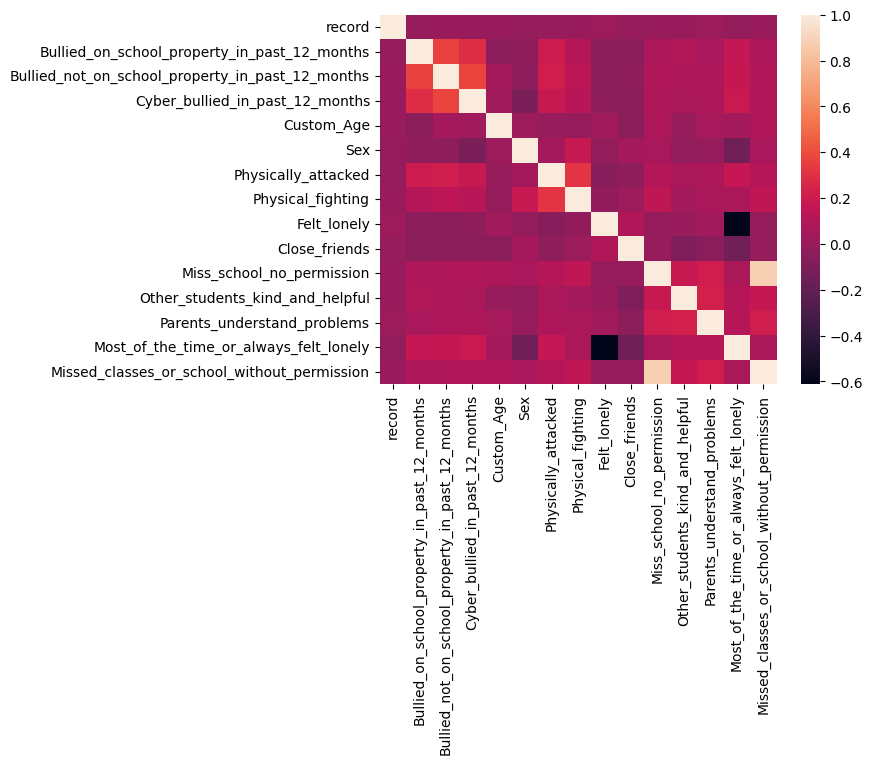

In [ ]:
sns.heatmap(c)

In [ ]:
#splitting all three w.r.t X/Y1, X/Y2 and X/Y3

In [ ]:
X_train,X_test,Y1_train,Y1_test = train_test_split(X,Y1,test_size = 0.4,random_state = 76)
X_train,X_test,Y2_train,Y2_test = train_test_split(X,Y2,test_size = 0.4,random_state = 76)
X_train,X_test,Y3_train,Y3_test = train_test_split(X,Y3,test_size = 0.4,random_state = 76)

In [ ]:
model1 = DecisionTreeClassifier()
model1.fit(X_train,Y1_train)

DecisionTreeClassifier()

In [ ]:
Y1_train_prediction = model1.predict(X_train)
Acc_Y1_train = accuracy_score(Y1_train_prediction,Y1_train)
print('Bullied_on_school_property_in_past_12_months prediction train Accuracy :',Acc_Y1_train*100)

Bullied_on_school_property_in_past_12_months prediction train Accuracy : 89.8122148122148


In [ ]:
Y1_test_prediction = model1.predict(X_test)
Acc_Y1_test = accuracy_score(Y1_test_prediction,Y1_test)
print('Bullied_on_school_property_in_past_12_months Prediction test Accuracy: ',Acc_Y1_test*100)

Bullied_on_school_property_in_past_12_months Prediction test Accuracy:  71.54389505549949


In [ ]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,Y2_train)

DecisionTreeClassifier()

In [ ]:
Y2_train_prediction = model2.predict(X_train)
Acc_Y2_train = accuracy_score(Y2_train_prediction,Y2_train)
print('Bullied_not_on_school_property_in_past_12_months prediction train Accuracy :',Acc_Y2_train*100)

Bullied_not_on_school_property_in_past_12_months prediction train Accuracy : 90.66339066339066


In [ ]:
Y2_test_prediction = model2.predict(X_test)
Acc_Y2_test = accuracy_score(Y2_test_prediction,Y2_test)
print('Bullied_not_on_school_property_in_past_12_months Prediction test Accuracy: ',Acc_Y2_test*100)

Bullied_not_on_school_property_in_past_12_months Prediction test Accuracy:  73.0838415302944


In [ ]:
model3 = DecisionTreeClassifier()

In [ ]:
model3.fit(X_train,Y3_train)

DecisionTreeClassifier()

In [ ]:
Y3_train

14148    1
41275    1
14931    1
33508    1
45971    0
        ..
22810    0
39296    1
9607     0
12279    0
35489    0
Name: Cyber_bullied_in_past_12_months, Length: 34188, dtype: int64

In [ ]:
print(Y1_train.shape)

(34188,)


In [ ]:
print(Y1_train)

14148    1
41275    0
14931    0
33508    0
45971    0
        ..
22810    1
39296    1
9607     0
12279    0
35489    0
Name: Bullied_on_school_property_in_past_12_months, Length: 34188, dtype: int64


In [ ]:
Y3_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 34188 entries, 14148 to 35489
Series name: Cyber_bullied_in_past_12_months
Non-Null Count  Dtype
--------------  -----
34188 non-null  int64
dtypes: int64(1)
memory usage: 534.2 KB


In [ ]:
Y3_train_prediction = model3.predict(X_train)
Acc_Y3_train = accuracy_score(Y3_train_prediction,Y3_train)
print('Cyber_bullied_in_past_12_months prediction train Accuracy :',Acc_Y3_train*100)

Cyber_bullied_in_past_12_months prediction train Accuracy : 90.35334035334034


In [ ]:
Y3_test_prediction = model3.predict(X_test)
Acc_Y3_test = accuracy_score(Y3_test_prediction,Y3_test)
print('Cyber_bullied_in_past_12_months Prediction test Accuracy: ',Acc_Y3_test*100)

Cyber_bullied_in_past_12_months Prediction test Accuracy:  72.50910367218005


In [ ]:
model3.predict([[0,0,0,0,2,2,2,0,1,1]])

array([2])

In [ ]:
tr=pd.DataFrame(Y1_test_prediction)

In [ ]:
tr.unique()

AttributeError: ignored

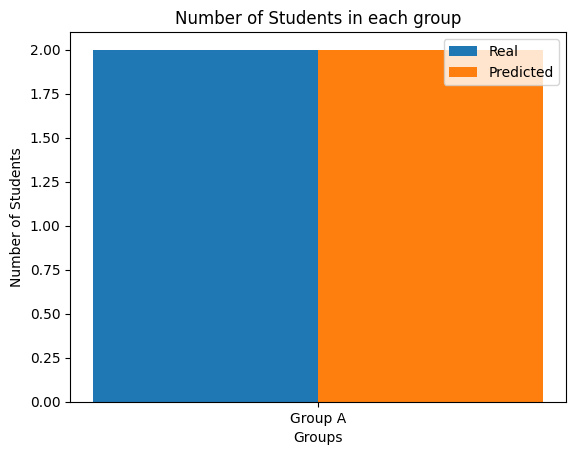

In [ ]:
X = ['Group A']

  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2,Y1_test, 0.4, label = 'Real')
plt.bar(X_axis + 0.2, Y1_test_prediction, 0.4, label = 'Predicted')
  
plt.xticks(X_axis, X)
plt.xlabel("Groups")
plt.ylabel("Number of Students")
plt.title("Number of Students in each group")
plt.legend()
plt.show()

In [ ]:
s = Y1_test[Y1_test=0]